# Question 1

/home/lino/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


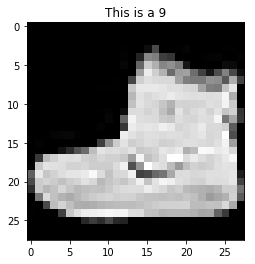

In [1]:
# plotting imports and setup
%matplotlib inline

import matplotlib.pyplot as plt

# Fashion MNIST is built into keras
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# How is the data stored?
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

# classes are already shuffled
y_train[:5]

X_train[0]

plt.imshow(X_train[0], cmap='gray')
plt.title("This is a %i" % y_train[0]);

In [2]:
def LabelConversion(i) :
    labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    if i in range(0,10) :
        return labels[i]
    else :
        print("{} is not an integer between 0 and 9".format(i))
        return

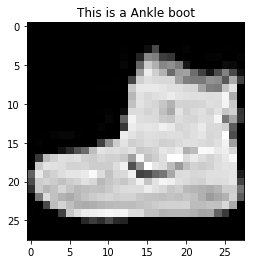

In [3]:
n = 0
plt.imshow(X_train[n], cmap='gray')
plt.title("This is a %s" % LabelConversion(y_train[n]));

# A first neural network 

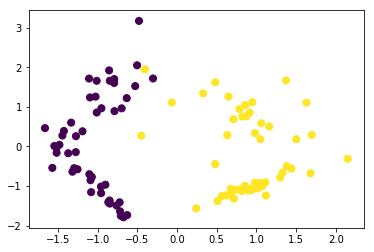

In [4]:
from sklearn.datasets import make_classification


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=50)

In [5]:
import numpy as np


def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

Y_ = one_hot(2, y)

In [6]:
from keras.layers import Input, Dense, Activation
from keras.models import Model

np.random.seed(123+3)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(2)(inputs)
# to find out more about activations check the keras documentation
predictions = Activation('softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

# to fit the model uncomment this line, experiment with the various settings
model.fit(X, Y_, epochs=100, verbose=False)
model.predict(np.array([[1,.9], [1,-.9]]))

array([[0.0704888 , 0.9295112 ],
       [0.07240287, 0.92759717]], dtype=float32)

In [30]:
import csv

import numpy as np
import matplotlib.pyplot as plt

import subprocess
from tempfile import mkstemp

from sklearn.tree import export_graphviz

from IPython.core.display import HTML


def plot_surface(clf, X, y, n_steps=250, subplot=None, show=True,
                 ylim=None, xlim=None):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    if xlim is None:
        xlim = X[:, 0].min(), X[:, 0].max()
    if ylim is None:
        ylim = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.PuOr)
    plt.scatter(X[:, 0], X[:, 1], c=y[:,0])
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if show:
        plt.show()

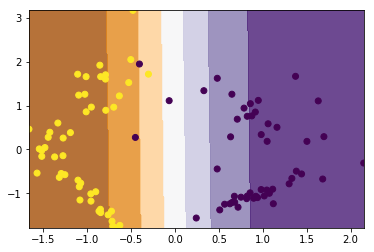

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#poly = PolynomialFeatures(degree=2, interaction_only = False)
#pipeline = Pipeline([("polynomial_features",poly), ("logistic_regression",rgr)])
#pipeline.fit(X_train,y_train)

#plot_surface(pipeline, X, y)
plot_surface(model, X, Y_)

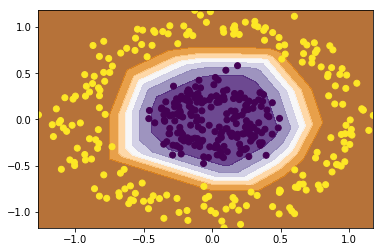

In [35]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
#y = np.take(labels, (y < 0.5))
Y2_ = one_hot(2, y2)

#plt.scatter(X2[:,0], X2[:,1], c=y2)

inputs2 = Input(shape=(2,))
x2 = Dense(10)(inputs2)
layer2 = Activation('relu')(x2)
layer2 = Dense(2)(layer2)
#layer3 = Activation('relu')(layer2)
#layer3 = Dense(2)(layer3)
predictions2 = Activation('softmax')(layer2)
model2 = Model(inputs=inputs2, outputs=predictions2)
model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
model2.fit(X2, Y2_, epochs=1000, verbose=False)

plot_surface(model2, X2, Y2_)

# Fashion neural network

In [39]:
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

from keras import utils


num_classes = 10
y_train_ = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

y_train[:5]

# modified y
y_train_[:5]



# let's make y_train the same as the others
y_train = utils.to_categorical(y_train, num_classes)


from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten

# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(28, 28, ))

# turn a 28x28 matrix into a 784-d vector, this removes all information
# about the spatial relation between pixels. Using convolutions will
# allow us to take advantage of that information (see later)
h = Flatten()(x)

#
# your network architecture here
#
layer2 = Dense(10)(h)
layer2 = Activation('relu')(layer2)

#layer3 = Activation('relu')(layer2)
#layer3 = Dense(2)(layer3)

# we want to predict one of ten classes
h = Dense(10)(layer2)
y = Activation('softmax')(h)

# Package it all up in a Model
net = Model(x, y)

net.summary()

net.compile(loss='categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy'])



batch_size = 128
history = net.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_val, y_val))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 28, 28)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_67 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_68 (Activation)   (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Train on